In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
model = VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
model.summary()

W0803 08:51:22.033223 140355562612608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 08:51:22.053380 140355562612608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 08:51:22.056374 140355562612608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 08:51:22.084443 140355562612608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0803 08:51:23.736948 140355562612608 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
from google.colab import files
files.upload()

Saving elephant.jpg to elephant.jpg


{'elephant.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 60\n\xff\xdb\x00C\x00\r\t\n\x0b\n\x08\r\x0b\n\x0b\x0e\x0e\r\x0f\x13 \x15\x13\x12\x12\x13\'\x1c\x1e\x17 .)10.)-,3:J>36F7,-@WAFLNRSR2>ZaZP`JQRO\xff\xdb\x00C\x01\x0e\x0e\x0e\x13\x11\x13&\x15\x15&O5-5OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO\xff\xc2\x00\x11\x08\x01{\x01\xf9\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1a\x00\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xb9+\xd3\xe6\xb9!r\xa1r\xac\x92H\x92B\xe5B\xe4\x84\x92\x12HK\xa8\\\xa8\\\x90\x92BI\x16I\x12I\x16I\t$$\x91$\x94\xb2H\x92H\xb2HI(\x92BI\x0b\xa9\t%\x17$$\x90\xaa\xbaK\x95-\xb9"I!$\x85\xca\x85\xc9\t Jv\x8b\xc6\x9bbeK\x1d\xe6\xe4\x89$\x84\x92\x12H\xb2H\\\xa8\\\xa8\\\x

In [4]:
!ls

cat.jpeg  elephant.jpg	sample_data


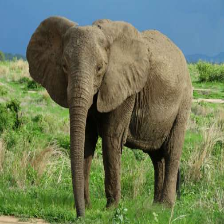

In [6]:
from google.colab.patches import cv_imshow
import cv2
img = cv2.imread('elephant.jpg')
img = cv2.resize(img, (224,224))
cv_imshow(img)

In [0]:
img = img.reshape((1,*img.shape))

In [9]:
print(img.shape)

(1, 224, 224, 3)


In [0]:
pred = model.predict(img)

In [0]:
from keras.applications.vgg16 import decode_predictions

In [13]:
decode_predictions(pred,top=3)[0]

[('n02504458', 'African_elephant', 0.777349),
 ('n01871265', 'tusker', 0.19961804),
 ('n02504013', 'Indian_elephant', 0.02303244)]

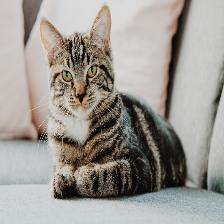

In [22]:
img_2 = cv2.imread('cat.jpeg')
img_2 = cv2.resize(img_2, (224,224))
cv_imshow(img_2)

In [0]:
img_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)

In [0]:
img_2 = img_2.reshape((1,*img_2.shape))

In [25]:
print(img_2.shape)

(1, 224, 224, 3)


In [0]:
pred_2 = model.predict(img_2)

In [27]:
decode_predictions(pred_2,top=3)[0]

[('n02123045', 'tabby', 0.3571398),
 ('n02123159', 'tiger_cat', 0.34323272),
 ('n02124075', 'Egyptian_cat', 0.25828928)]